# Pharma sales prediction_Project 6_Ajit_Kumar

## Task 1: Customer Purchasing Behavior Analysis

In [ ]:
# Uninstall numpy and matplotlib completely
!pip uninstall -y numpy matplotlib

# Install specific compatible versions of numpy and matplotlib
!pip install numpy==1.23.5 matplotlib==3.6.3

# Restart the kernel (necessary for changes to take effect)
import os
os._exit(00)

# After restarting, try to import the libraries again
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Print versions to confirm the correct versions are installed
print("Numpy version:", np.__version__)
print("Matplotlib version:", plt.__version__)
print("Seaborn version:", sns.__version__)
print("Pandas version:", pd.__version__)


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Successfully uninstalled matplotlib-3.6.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Ajit Kumar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df_train=pd.read_csv("train.csv")
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
df_train.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

### Considering day 1 as Monday as Day 7 as Sunday. Replacing column entries

In [10]:
df_train["DayOfWeek"]=df_train["DayOfWeek"].replace({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"})
df_train["DayOfWeek"].unique()

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Saturday'], dtype=object)

### Open column entries change

In [11]:
df_train["Open"].unique()

array([1, 0], dtype=int64)

df_train["Open"]=df_train["Open"].replace({1:"Open",0:"Closed"})
df_train["Open"].unique()

In [12]:
df_train["Promo"].unique()

array([1, 0], dtype=int64)

df_train["Promo"]=df_train["Promo"].replace({1:"Promo",0:"No Promo"})
df_train["Promo"].unique()

In [13]:
df_train["SchoolHoliday"].unique()

array([1, 0], dtype=int64)

df_train["SchoolHoliday"]=df_train["SchoolHoliday"].replace({1:"Yes",0:"No"})
df_train["SchoolHoliday"].unique()

In [14]:
df_train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [15]:
df_train["StateHoliday"]=df_train["StateHoliday"].replace({"a":"Public Holiday","b":"Easter Holiday","c":"Xmas",0:"None",'0':"None"})
df_train["StateHoliday"].unique()

array(['None', 'Public Holiday', 'Easter Holiday', 'Xmas'], dtype=object)

In [16]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,Friday,2015-07-31,5263,555,1,1,None,1
1,2,Friday,2015-07-31,6064,625,1,1,None,1
2,3,Friday,2015-07-31,8314,821,1,1,None,1
3,4,Friday,2015-07-31,13995,1498,1,1,None,1
4,5,Friday,2015-07-31,4822,559,1,1,None,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,Tuesday,2013-01-01,0,0,0,0,Public Holiday,1
1017205,1112,Tuesday,2013-01-01,0,0,0,0,Public Holiday,1
1017206,1113,Tuesday,2013-01-01,0,0,0,0,Public Holiday,1
1017207,1114,Tuesday,2013-01-01,0,0,0,0,Public Holiday,1


## Loading test data

In [17]:
df_test=pd.read_csv("test.csv")
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [19]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [20]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [21]:
df_test.duplicated().sum()

0

In [22]:
df_test["Open"]=df_test["Open"].fillna(df_test["Open"].mean())

In [23]:
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [24]:
df_test["DayOfWeek"]=df_test["DayOfWeek"].replace({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"})
df_test["DayOfWeek"].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [25]:
df_test["Open"].unique()

array([1.        , 0.85432237, 0.        ])

df_test["Open"]=df_test["Open"].replace({1:"Open",0:"Closed","0.8543223701828274":"Open"})
df_test["Open"].unique()

In [26]:
df_test["Promo"].unique()

array([1, 0], dtype=int64)

df_test["Promo"]=df_test["Promo"].replace({1:"Promo",0:"No Promo"})
df_test["Promo"].unique()

In [27]:
df_test["StateHoliday"].unique()

array(['0', 'a'], dtype=object)

In [28]:
df_test["StateHoliday"]=df_test["StateHoliday"].replace({"a":"Public Holiday",'0':"None"})
df_test["StateHoliday"].unique()

array(['None', 'Public Holiday'], dtype=object)

In [29]:
df_test["SchoolHoliday"].unique()

array([0, 1], dtype=int64)

df_test["SchoolHoliday"]=df_test["SchoolHoliday"].replace({1:"Yes",0:"No"})
df_test["SchoolHoliday"].unique()

In [30]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,Thursday,2015-09-17,1.0,1,None,0
1,2,3,Thursday,2015-09-17,1.0,1,None,0
2,3,7,Thursday,2015-09-17,1.0,1,None,0
3,4,8,Thursday,2015-09-17,1.0,1,None,0
4,5,9,Thursday,2015-09-17,1.0,1,None,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,Saturday,2015-08-01,1.0,0,None,0
41084,41085,1112,Saturday,2015-08-01,1.0,0,None,0
41085,41086,1113,Saturday,2015-08-01,1.0,0,None,0
41086,41087,1114,Saturday,2015-08-01,1.0,0,None,0


### converting Date column into date time format

In [31]:
df_train['Date']=pd.to_datetime(df_train['Date'], errors='coerce')

In [32]:
print(df_train['Date'].dtype)

datetime64[ns]


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  object        
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 69.8+ MB


In [34]:
df_test['Date']=pd.to_datetime(df_test['Date'], errors='coerce')
print(df_test['Date'].dtype)

datetime64[ns]


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  object        
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.5+ MB


In [36]:
#Compare the distribution of promotions across training and test sets.

<AxesSubplot: xlabel='Promo', ylabel='count'>

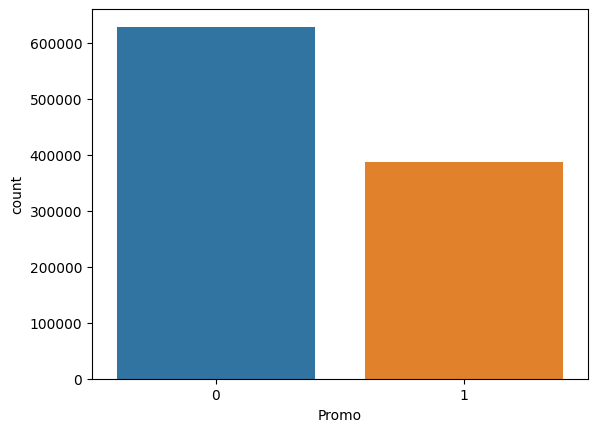

In [37]:
sns.countplot(x="Promo",data=df_train)

<AxesSubplot: xlabel='Promo', ylabel='Count'>

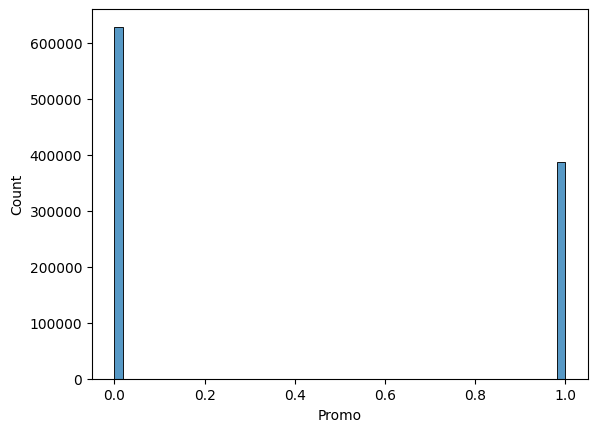

In [38]:
sns.histplot(x="Promo",data=df_train)

<AxesSubplot: xlabel='Promo', ylabel='count'>

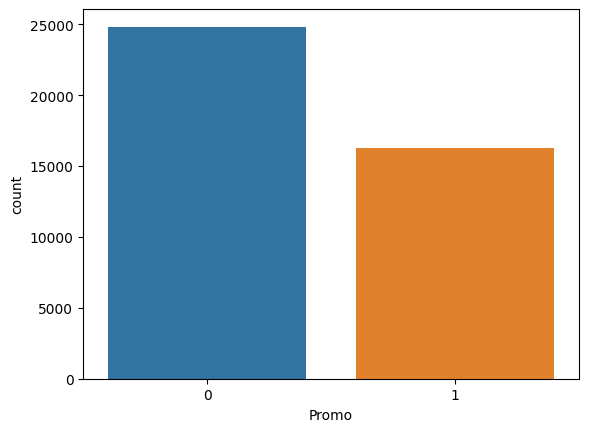

In [39]:
sns.countplot(x="Promo",data=df_test)

## Loading store data


In [40]:
df=pd.read_csv("store.csv")
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [42]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [43]:
df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Merging store dataset with test and train dataset

In [44]:
#merging with train data
df1=pd.merge(df,df_train,on='Store',how='inner')
df1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Friday,2015-07-31,5263,555,1,1,None,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Thursday,2015-07-30,5020,546,1,1,None,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Wednesday,2015-07-29,4782,523,1,1,None,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Tuesday,2015-07-28,5011,560,1,1,None,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Monday,2015-07-27,6102,612,1,1,None,1


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1014567 non-null  float64       
 4   CompetitionOpenSinceMonth  693861 non-null   float64       
 5   CompetitionOpenSinceYear   693861 non-null   float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            509178 non-null   float64       
 8   Promo2SinceYear            509178 non-null   float64       
 9   PromoInterval              509178 non-null   object        
 10  DayOfWeek                  1017209 non-null  object        
 11  Date                       1017209 no

In [46]:
#merging with test data
df2=pd.merge(df,df_test,on='Store',how='inner')
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,Thursday,2015-09-17,1.0,1,None,0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,Wednesday,2015-09-16,1.0,1,None,0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,Tuesday,2015-09-15,1.0,1,None,0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,Monday,2015-09-14,1.0,1,None,0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,Sunday,2015-09-13,0.0,0,None,0


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   StoreType                  41088 non-null  object        
 2   Assortment                 41088 non-null  object        
 3   CompetitionDistance        40992 non-null  float64       
 4   CompetitionOpenSinceMonth  25872 non-null  float64       
 5   CompetitionOpenSinceYear   25872 non-null  float64       
 6   Promo2                     41088 non-null  int64         
 7   Promo2SinceWeek            23856 non-null  float64       
 8   Promo2SinceYear            23856 non-null  float64       
 9   PromoInterval              23856 non-null  object        
 10  Id                         41088 non-null  int64         
 11  DayOfWeek                  41088 non-null  object        
 12  Date

## Filling null values

In [48]:
df1.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [49]:
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
    mode_value = df1[col].mode()[0] 
    df1[col].fillna(mode_value, inplace=True)

In [50]:
df1.isnull().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
dtype: int64

In [51]:
# Fill null values in 'CompetitionDistance' with the median
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)

In [52]:
df1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

## Label encoding for Correlation

In [53]:
from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

In [54]:
#checking data type again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  int32         
 2   Assortment                 1017209 non-null  int32         
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  float64       
 8   Promo2SinceYear            1017209 non-null  float64       
 9   PromoInterval              1017209 non-null  int32         
 10  DayOfWeek                  1017209 non-null  int32         
 11  Date                       1017209 no

### Checking Correlation 

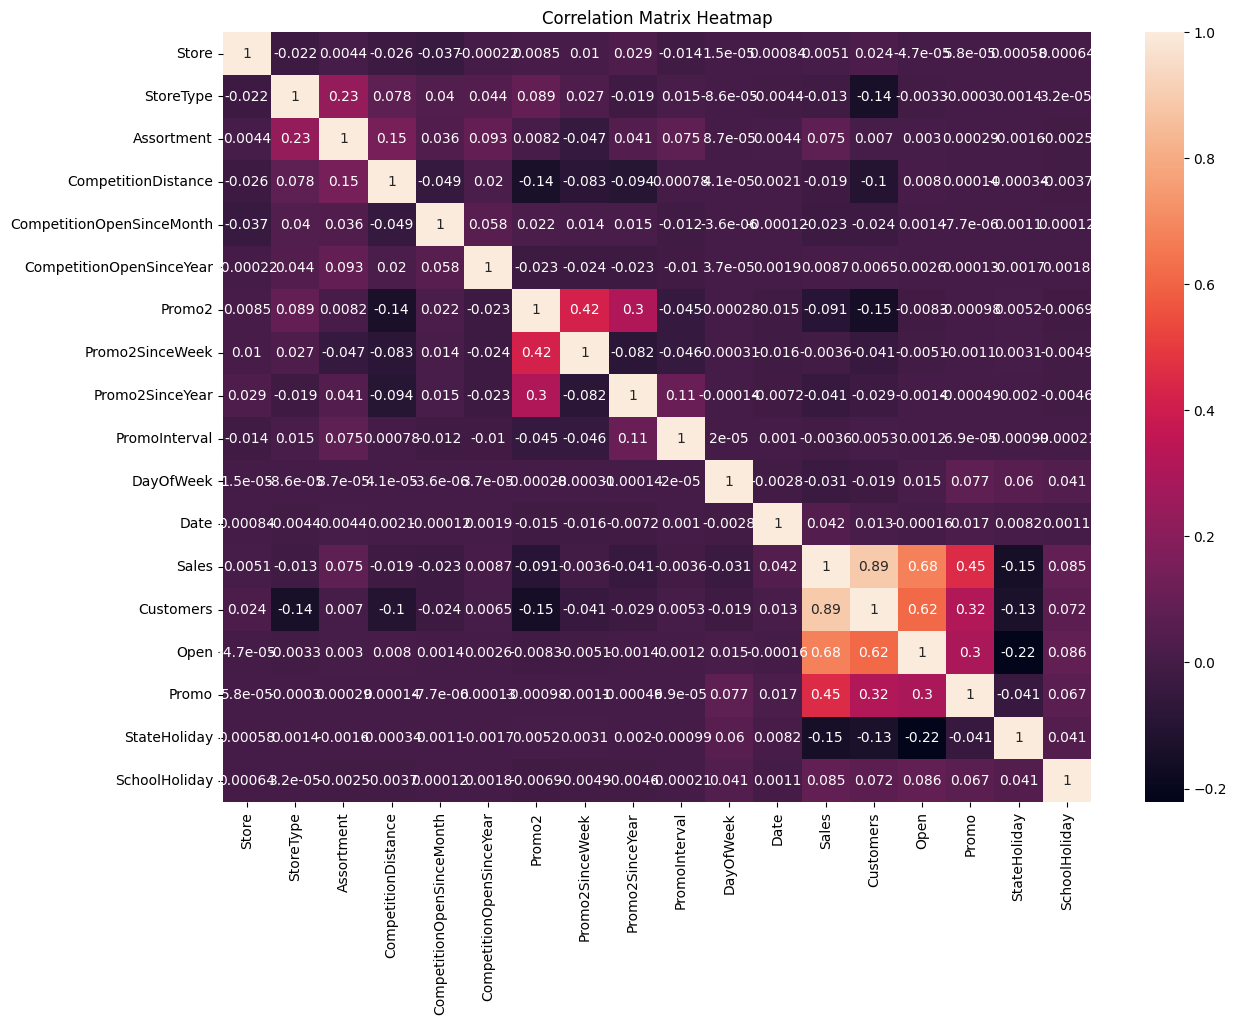

In [55]:
 #correlation matrix
correlation_matrix = df1.corr()

# Create the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analysis

Customers and Open have correlation more than 0.5

Customers - 0.89

Open -0.62


While Promo is moderately correlated to Sales

### Sales by store type

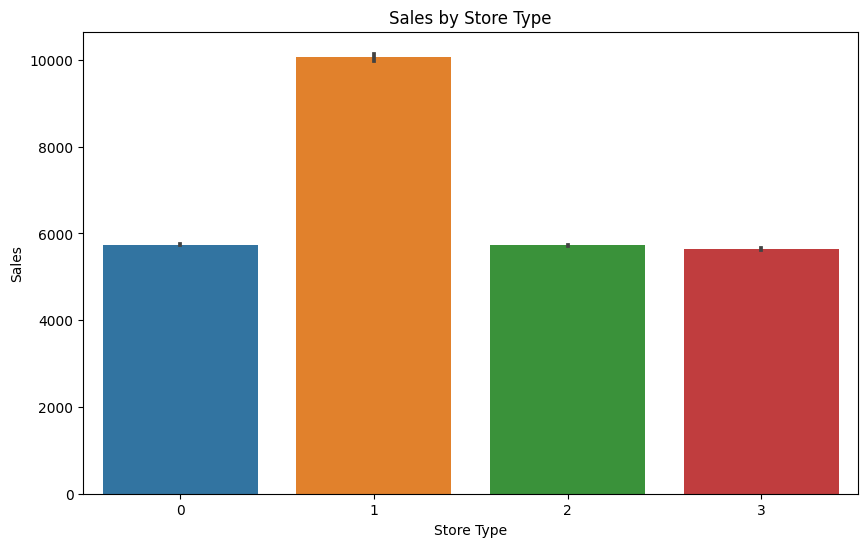

In [56]:

plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=df1)
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

### Sales by Customer

<Figure size 1400x800 with 0 Axes>

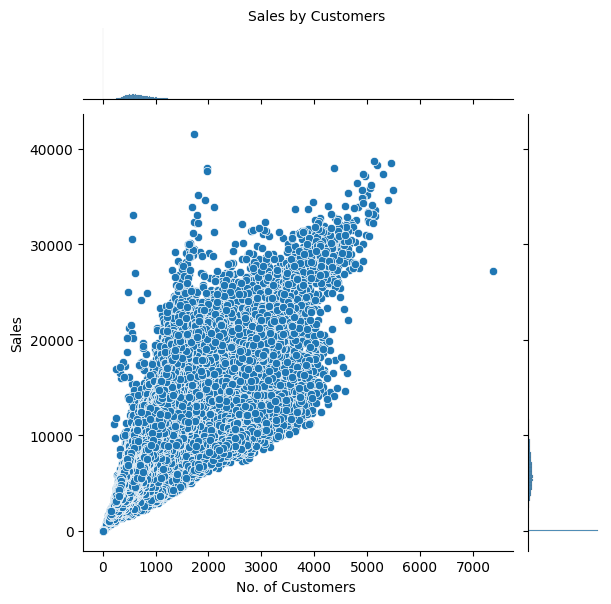

In [57]:
plt.figure(figsize=(14, 8))
sns.jointplot(x='Customers', y='Sales', data=df1)
plt.suptitle('Sales by Customers', fontsize=10, y=1)
plt.xlabel('No. of Customers ')
plt.ylabel('Sales')
plt.show()

### Sales by Store type

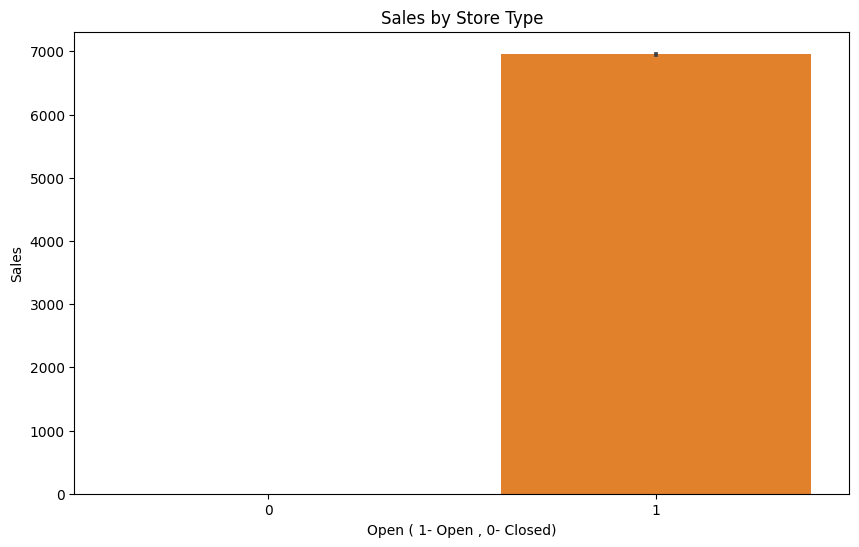

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Open', y='Sales', data=df1)
plt.title('Sales by Store Type')
plt.xlabel('Open ( 1- Open , 0- Closed)')
plt.ylabel('Sales')
plt.show()

### Sales by Promo Type

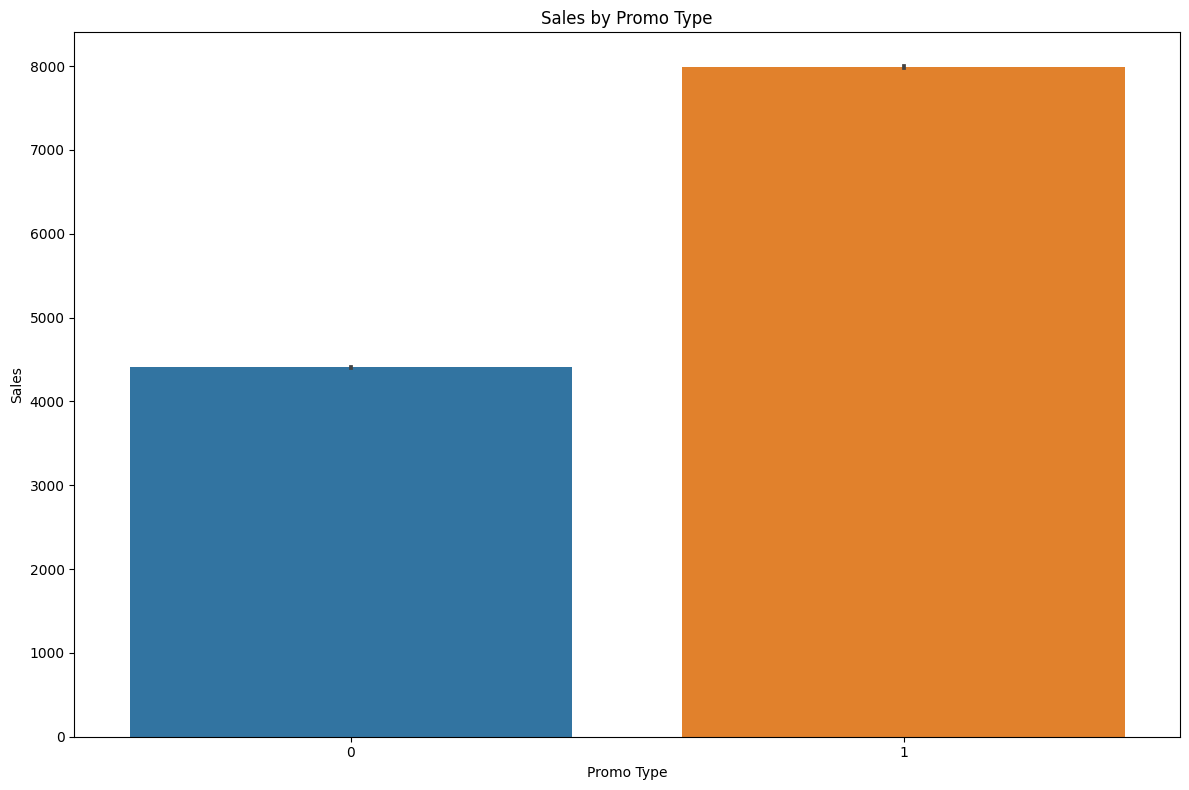

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Promo', y='Sales', data=df1)
plt.title('Sales by Promo Type')
plt.xlabel('Promo Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

### Sales by Assortment type

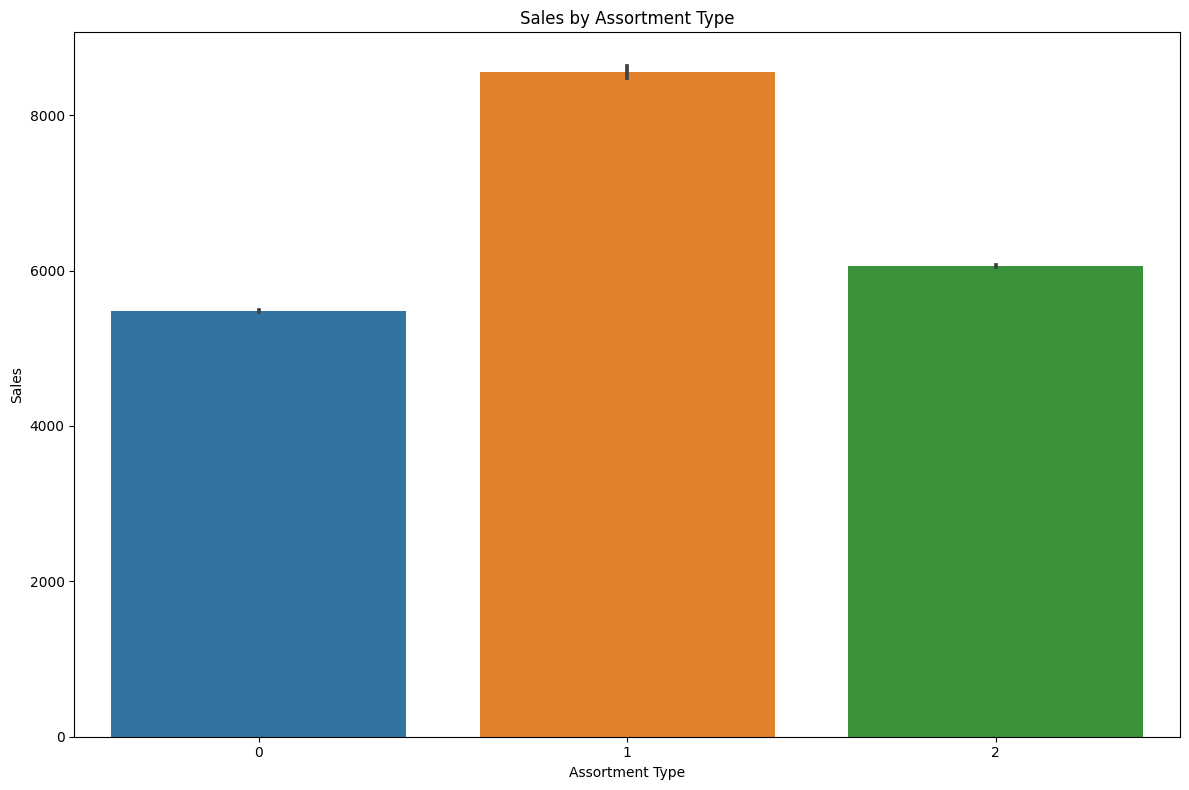

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Assortment', y='Sales', data=df1)
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## Monthly Sales

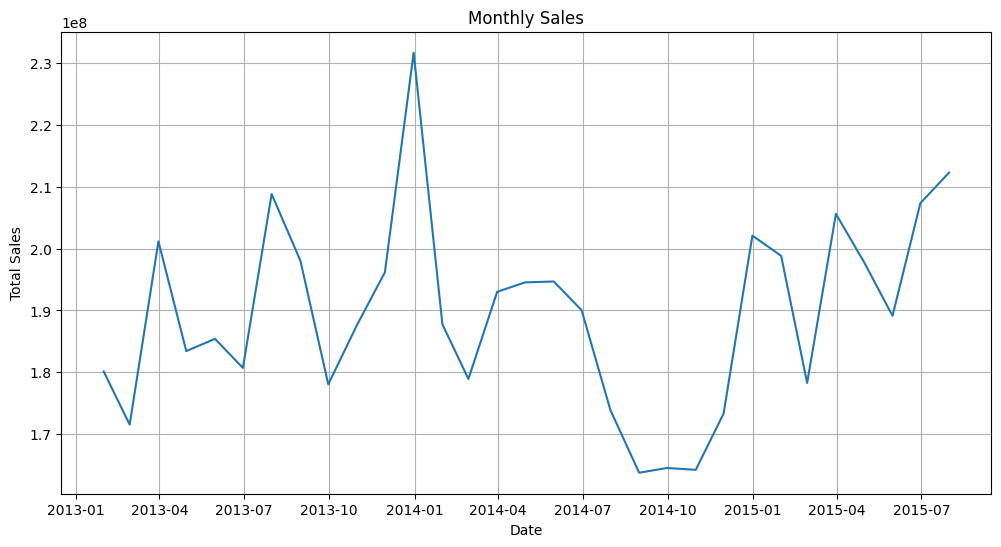

In [61]:
# Convert 'Date' column to datetime objects if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Set 'Date' as the index
df1 = df1.set_index('Date')

# Resample to a desired frequency (e.g., monthly) and sum the sales
df1_monthly = df1['Sales'].resample('M').sum()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df1_monthly)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [62]:
def outliers(df1):
    """
    Finds outliers in numerical features of a DataFrame.

    Args:
        df1: The input DataFrame.

    Returns:
        DataFrame with treated outliers.
    """

    numerical_features = df1.select_dtypes(include=np.number).columns
    for feature in numerical_features:
        Q1 = df1[feature].quantile(0.25)
        Q3 = df1[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df1[feature] = np.clip(df1[feature], lower_bound, upper_bound)

    return df1

# Example usage (assuming df1 is your DataFrame):
df1 = outliers(df1)

### Box plot with hue as PromoInterval and finding the average sales

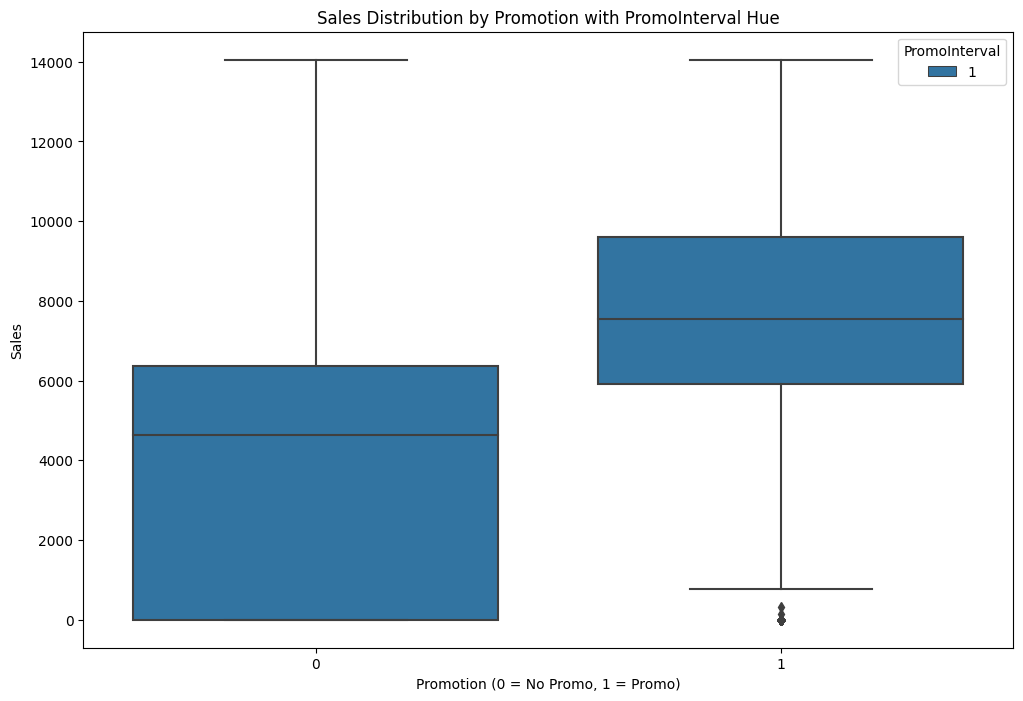

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [63]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Promo', y='Sales', data=df1, hue='PromoInterval')
plt.title('Sales Distribution by Promotion with PromoInterval Hue')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df1[df1['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df1[df1['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

### Correlation between Competition Distance and Sales

Correlation between Competition Distance and Sales: -0.016641523291189047
CompetitionDistance_binned
(3.885, 1631.5]       5843.554919
(1631.5, 3243.0]      5562.090193
(3243.0, 4854.5]      5565.823672
(4854.5, 6466.0]      5431.147907
(6466.0, 8077.5]      5708.927684
(8077.5, 9689.0]      5613.975213
(9689.0, 11300.5]     5536.499342
(11300.5, 12912.0]    5683.047411
(12912.0, 14523.5]    5468.583680
(14523.5, 16135.0]    5679.213774
Name: Sales, dtype: float64


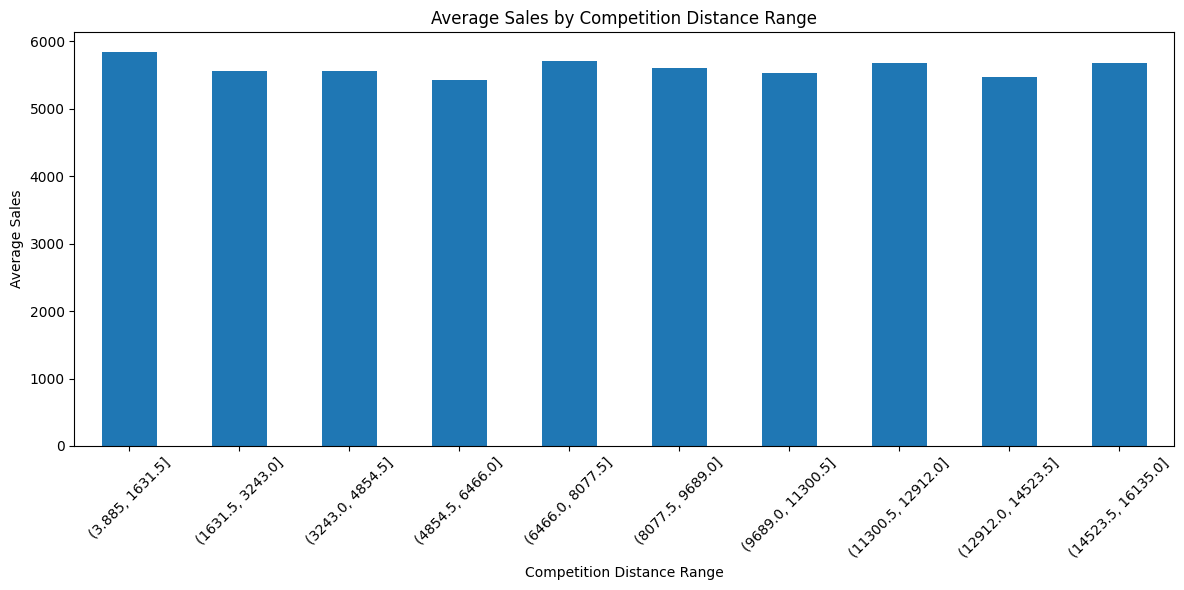

In [64]:
# Calculate the correlation coefficient
correlation = df1['CompetitionDistance'].corr(df1['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation}")

#Binning data
df1['CompetitionDistance_binned'] = pd.cut(df1['CompetitionDistance'], bins=10)  # Adjust number of bins

# Calculate mean sales per bin
sales_by_distance_bin = df1.groupby('CompetitionDistance_binned')['Sales'].mean()
print(sales_by_distance_bin)

# Plot the average sales for different competition distance ranges
plt.figure(figsize=(12, 6))
sales_by_distance_bin.plot(kind='bar')
plt.xlabel('Competition Distance Range')
plt.ylabel('Average Sales')
plt.title('Average Sales by Competition Distance Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average sales over week

DayOfWeek
0    6651.862697
1    7599.173160
2    5794.275461
3     183.358129
4    6185.296246
5    6907.151619
6    6490.340463
Name: Sales, dtype: float64


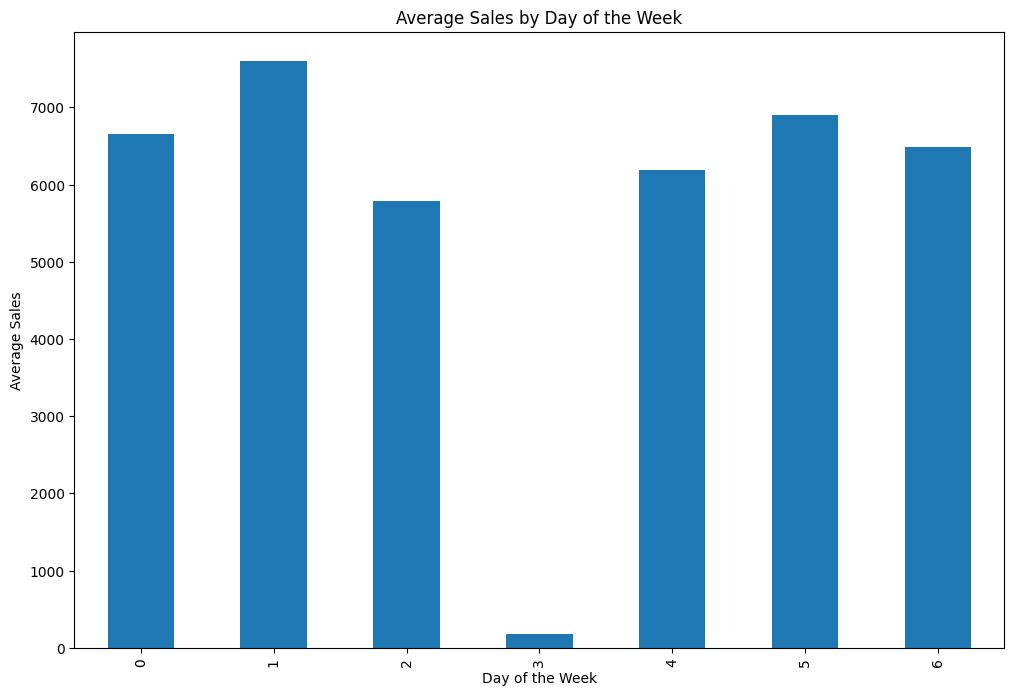

In [65]:
# Calculate average sales for each day of the week  
average_sales_by_day = df1.groupby('DayOfWeek')['Sales'].mean()

# Print the result
print(average_sales_by_day)

#Optional: Create a bar plot to visualize the average sales for each day of the week
plt.figure(figsize=(12, 8))
average_sales_by_day.plot(kind='bar')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

### Building ARIMA model with time series

In [66]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# Split data into training and testing sets
train_data = df1['Sales'][:-12]  # Last 12 data points for testing
test_data = df1['Sales'][-12:]

# Build and train the ARIMA model
# (p, d, q) are the model orders - you need to find the optimal values using techniques like ACF and PACF plots
# or automated order selection methods.  These values are placeholders.
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(df1['Sales']) - 1)



C:\Users\Ajit Kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajit Kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajit Kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajit Kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajit 

In [67]:
# Evaluate the model
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2656.662


### Building SARIMA model with time series

C:\Users\Ajit Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error: 20649531.333399463


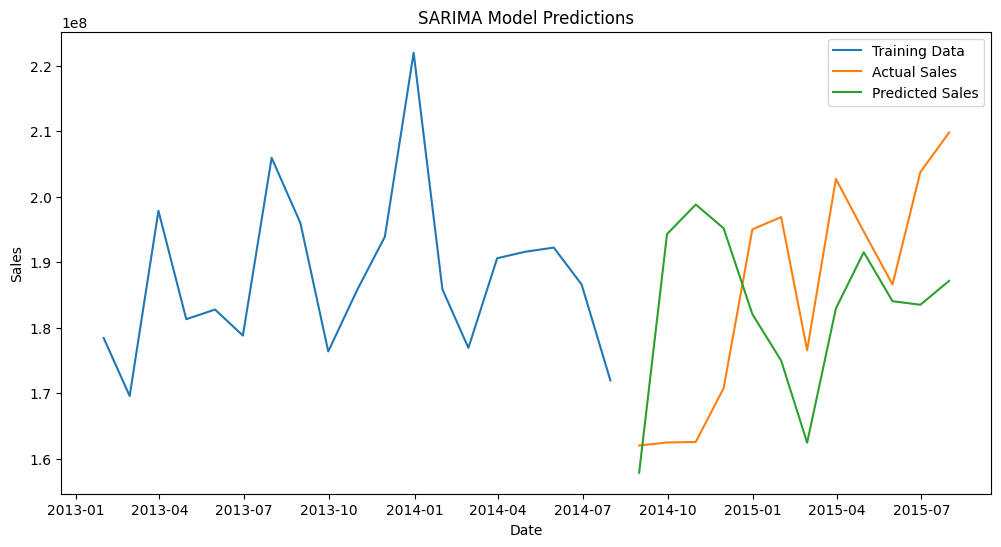

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Resample the data to monthly frequency
df1_monthly = df1['Sales'].resample('M').sum()

# Split data into training and testing sets
train_data = df1_monthly[:-12]
test_data = df1_monthly[-12:]

# Fit the SARIMA model
# Experiment with different (p, d, q) and (P, D, Q, s) values
try:
    model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 2, 6)) # Example order, adjust as needed
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train_data), end=len(df1_monthly)-1)

    # Evaluate the model
    rmse = mean_squared_error(test_data, predictions, squared=False)
    print(f"Root Mean Squared Error: {rmse}")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual Sales')
    plt.plot(predictions, label='Predicted Sales')
    plt.title('SARIMA Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

### Avergae monthly sales over time

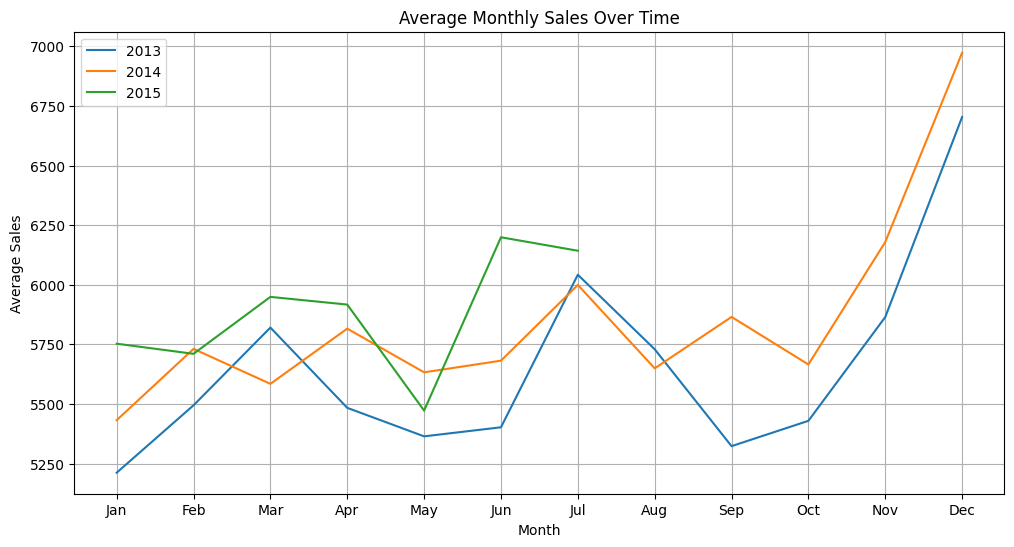

Year
2013    6703.618140
2014    6973.282456
Name: Sales, dtype: float64


In [69]:

# Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')

# Convert 'Date' to datetime if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract month and year for easier analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

# Group by month and year to calculate average sales for each month
monthly_sales = df1.groupby(['Month', 'Year'])['Sales'].mean().reset_index()

# Plot average sales for each month across different years
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales Over Time')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# Further analysis (optional):
# 1. Calculate the average sales for specific months (e.g., December for Christmas)
# 2. Compare sales in those months across different years.
# 3. Consider using a boxplot to visualize the distribution of sales in specific months.
# Example for December:
december_sales = df1[df1['Month'] == 12]
print(december_sales.groupby('Year')['Sales'].mean())

### Purchasing patterns analysis

In [70]:
# Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')

# Convert 'Date' to datetime if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract month and year for easier analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

# Calculate December average sales
december_sales = df1[df1['Month'] == 12]['Sales'].mean()

# Calculate average sales for months other than December
other_months_sales = df1[df1['Month'] != 12]['Sales'].mean()

print(f"Average December Sales: {december_sales}")
print(f"Average Sales (excluding December): {other_months_sales}")

Average December Sales: 6826.611376868607
Average Sales (excluding December): 5703.662913053828


### Analysis of Average Monthly Sales During Holiday and Non Holiday Months

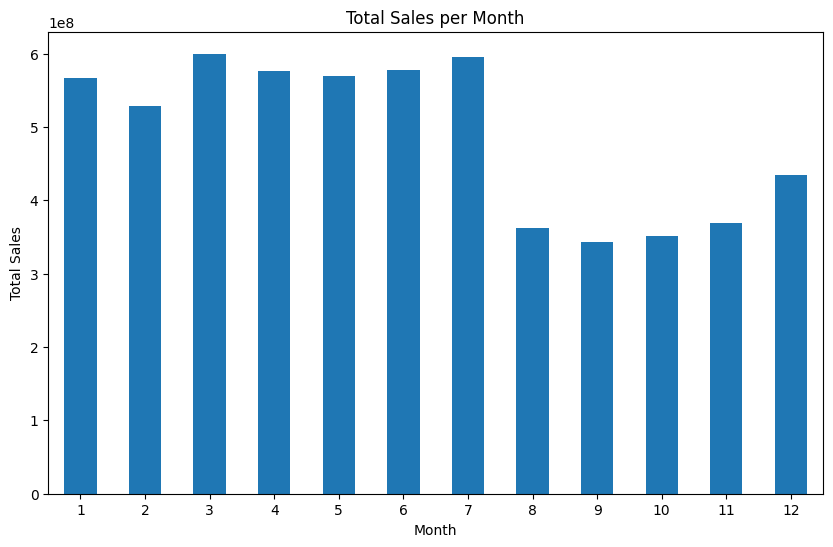

December Sales: 433831153
Average Sales in other months: 494486315.45454544


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')
df1['Date']=pd.to_datetime(df1['Date'])

# Group data by month and calculate total sales
df1['Month'] = df1['Date'].dt.month
monthly_sales = df1.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=0)
plt.show()

# Identify potential seasonal patterns (e.g., December for Christmas)
# Example: Analyze sales in December compared to other months
december_sales = monthly_sales[12]  # Assuming December is month 12
average_sales_other_months = monthly_sales[monthly_sales.index != 12].mean()

print(f"December Sales: {december_sales}")
print(f"Average Sales in other months: {average_sales_other_months}")

# Further analysis: Compare sales during holiday periods with other periods.
# Consider using statistical tests to confirm significance.

# For example, create a function to check if a date falls within a holiday period:

def holiday(date):
    # Define the holiday periods (example: Christmas)
    christmas_start = pd.to_datetime('2013-12-15')
    christmas_end = pd.to_datetime('2013-12-26')
    # Add more holiday periods as needed
    if christmas_start <= date <= christmas_end:
      return True
    return False

df1['IsChristmasPeriod'] = df1['Date'].apply(holiday)

# Calculate average sales for Christmas Period
christmas_sales = df1[df1['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales in Christmas period: {christmas_sales}")


# Analyze sales in the Christmas period compared to the non-Christmas period
non_christmas_sales = df1[~df1['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales outside Christmas period: {non_christmas_sales}")


# Calculate and plot monthly sales with a moving average to smooth out noise
window_size = 3  # Example window size for moving average
monthly_sales_ma = monthly_sales.rolling(window=window_size, center=True).mean()


plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(monthly_sales_ma, label='3-Month Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


### Anlyzing trends of sales based on store opening/closing times

In [ ]:

# Convert 'Date' to datetime if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index('Date')

# Group data by 'Open' status and calculate descriptive statistics of sales
sales_by_open_status = df1.groupby('Open')['Sales'].describe()

print(sales_by_open_status)

# Visualize the distribution of sales for open and closed stores using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Open', y='Sales', data=df1)
plt.title('Sales Distribution by Store Open Status')
plt.xlabel('Store Open (1 = Open, 0 = Closed)')
plt.ylabel('Sales')
plt.show()

#Further analysis (optional)
# Statistical test to compare sales distributions
# Separate sales data for open and closed stores

# Analyze sales trends over time for open and closed stores
# Group by month and then open status


# Group data by month and open status and calculate average sales
monthly_sales_by_open_status = df1.groupby([df1.index.month, 'Open'])['Sales'].mean().unstack()

# Plot monthly sales for open and closed stores
plt.figure(figsize=(10, 6))
monthly_sales_by_open_status.plot(kind='line', marker='o')  # Use line plot
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales by Store Open Status')
plt.legend(['Closed', 'Open']) # set legend
plt.grid(True)
plt.show()

## Task 2: Sales Prediction

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns using imputation (e.g., mean)
imputer = SimpleImputer(strategy='mean')  # other strategies like 'median' or 'most_frequent'
df1[numerical_cols] = imputer.fit_transform(df1[numerical_cols])

# Handle missing values in categorical columns using imputation (e.g., most frequent)
imputer_categorical = SimpleImputer(strategy='most_frequent')
df1[categorical_cols] = imputer_categorical.fit_transform(df1[categorical_cols])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

print(df1.head())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')
df1['Date']=pd.to_datetime(df1['Date'])



In [ ]:
# Extract features from the 'Date' column

df1['DayOfWeek'] = df1['Date'].dt.dayofweek  # Monday=0, Sunday=6
df1['IsWeekend'] = df1['DayOfWeek'] >= 5  # 1 if weekend, 0 otherwise

# Example holidays (replace with actual holiday dates)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01'])

# Calculate days to/from holidays
def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df1['DaysToHoliday'] = df1['Date'].apply(lambda x: days_to_holiday(x, holidays))

print(df1['IsWeekend'].value_counts())

### Outliers treatment

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
 #Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')
df1['Date']=pd.to_datetime(df1['Date'])

In [ ]:

df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df1[col].fillna('unknown', inplace=True)



for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df1 = treat_outliers_capping(df1,col)


# Split data into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

### Checking accuracy of model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

### Implementing Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')
df1['Date']=pd.to_datetime(df1['Date'])

In [ ]:

df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df1[col].fillna('unknown', inplace=True)

for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

# Convert object data type features to string
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'

# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df1 = treat_outliers_capping(df1,col)

# Split data into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales for the first 10 IDs in the test set
df_test = X_test.head(10) # 
sales_predictions = model.predict(df_test)

sales_predictions

### Sales prediction for 42 days

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')


# Preprocessing
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
    df1[col].fillna('unknown', inplace=True)

for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# Feature Engineering (Important:  Adapt to your actual data and needs)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['DayOfWeek'] = df1['Date'].dt.dayofweek
df1['IsWeekend'] = (df1['DayOfWeek'] >= 5).astype(int)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01']) #Example holidays, update as needed.

def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df1['DaysToHoliday'] = df1['Date'].apply(lambda x: days_to_holiday(x, holidays))

# Feature Selection
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
            'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
target = 'Sales'

# Outlier Treatment
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df1 = treat_outliers_capping(df1, col)

# Model Training
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction (Example - adapt to your df_test)
# Assuming df_test contains the features for the next six weeks
# Create a sample df_test for demonstration
last_date = df1['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=42) #Six weeks = 42 days
df_test = pd.DataFrame({'Date': future_dates})
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek
df_test['IsWeekend'] = (df_test['DayOfWeek'] >=5).astype(int)
df_test['DaysToHoliday'] = df_test['Date'].apply(lambda x: days_to_holiday(x, holidays))
# Fill other features with some placeholder value (replace with actual data)
for col in features:
  if col not in df_test.columns:
      df_test[col] = df1[col].mean() # Example, replace with a more sensible strategy

#Ensure correct order of features and dtype
df_test = df_test[features]
for col in features:
  df_test[col] = df_test[col].astype(df1[col].dtype)

sales_predictions = model.predict(df_test)

# Save predictions to CSV
predictions_df = pd.DataFrame({'Date': future_dates, 'SalesPrediction': sales_predictions})
predictions_df.to_csv('sales_predictions.csv', index=False)

### Web based prediction service

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')


# Function to predict sales based on input
def predict_sales(store_id, date_str, promo):
    # Preprocess the input data
    input_data = pd.DataFrame({'Store': [store_id], 'Date': [date_str], 'Promo': [promo]})
    input_data['Date'] = pd.to_datetime(input_data['Date'])
    input_data['DayOfWeek'] = input_data['Date'].dt.dayofweek
    input_data['IsWeekend'] = (input_data['DayOfWeek'] >= 5).astype(int)

    # ... (Feature engineering and preprocessing for the input data, similar to how you did for your original dataset) ...

    # Make a prediction
    predicted_sales = model.predict(input_data[features])  # Assuming 'features' is defined from your model training
    return predicted_sales[0]


# HTML file content
html_content = """
<!DOCTYPE html>
<html>
<head>
<title>Sales Prediction</title>
</head>
<body>
<h1>Sales Prediction</h1>

<form id="predictionForm">
  <label for="store_id">Store ID:</label><br>
  <input type="number" id="store_id" name="store_id" required><br><br>

  <label for="date">Date (YYYY-MM-DD):</label><br>
  <input type="date" id="date" name="date" required><br><br>

  <label for="promo">Promo (0 or 1):</label><br>
  <input type="number" id="promo" name="promo" min="0" max="1" required><br><br>

  <button type="submit">Predict Sales</button>
</form>
<div id="result"></div>


<script>
  const form = document.getElementById('predictionForm');
  const resultDiv = document.getElementById('result');

  form.addEventListener('submit', async (event) => {
    event.preventDefault();

    const store_id = document.getElementById('store_id').value;
    const date = document.getElementById('date').value;
    const promo = document.getElementById('promo').value;

    const response = await fetch('/predict', { // Replace /predict with the actual route
      method: 'POST',
      headers: {
        'Content-Type': 'application/json'
      },
      body: JSON.stringify({ store_id: store_id, date: date, promo: promo})
    });
    const data = await response.json();
    resultDiv.innerHTML = `Predicted Sales: ${data.prediction}`;
  });

</script>

</body>
</html>
"""

with open("sales_predictor.html", "w") as f:
    f.write(html_content)

# Server-side code (e.g. using Flask) to handle predictions:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    store_id = int(data['store_id'])  #ensure it is int
    date = data['date']
    promo = int(data['promo']) #ensure it is int
    prediction = predict_sales(store_id, date, promo)  # Call your prediction function
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)


### Sales Prediction for 42 Days Period using on Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')

# Preprocessing
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
    df1[col].fillna('unknown', inplace=True)

for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# Feature Engineering (Important:  Adapt to your actual data and needs)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['DayOfWeek'] = df1['Date'].dt.dayofweek
df1['IsWeekend'] = (df1['DayOfWeek'] >= 5).astype(int)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01']) #Example holidays, update as needed.

def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df1['DaysToHoliday'] = df1['Date'].apply(lambda x: days_to_holiday(x, holidays))

# Feature Selection
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
            'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
target = 'Sales'

# Outlier Treatment
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df1 = treat_outliers_capping(df1, col)

# Model Training
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction (Example - adapt to your df_test)
# Assuming df_test contains the features for the next six weeks
# Create a sample df_test for demonstration
last_date = df1['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=42) #Six weeks = 42 days
df_test = pd.DataFrame({'Date': future_dates})
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek
df_test['IsWeekend'] = (df_test['DayOfWeek'] >=5).astype(int)
df_test['DaysToHoliday'] = df_test['Date'].apply(lambda x: days_to_holiday(x, holidays))
# Fill other features with some placeholder value (replace with actual data)
for col in features:
  if col not in df_test.columns:
      df_test[col] = df1[col].mean() # Example, replace with a more sensible strategy

#Ensure correct order of features and dtype
df_test = df_test[features]
for col in features:
  df_test[col] = df_test[col].astype(df1[col].dtype)

sales_predictions = model.predict(df_test)

# Save predictions to CSV
predictions_df = pd.DataFrame({'Date': future_dates, 'SalesPrediction': sales_predictions})
predictions_df.to_csv('sales_predictions.csv', index=False)

### Logger implementation

In [ ]:
import logging

class Logger:
    def __init__(self, log_file="app.log"):
        self.logger = logging.getLogger(__name__)
        self.logger.setLevel(logging.INFO)

        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        self.logger.addHandler(file_handler)

        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        self.logger.addHandler(console_handler)

    def log_step(self, message):
        self.logger.info(message)

# Example usage (adapt to your code)
logger = Logger()
logger.log_step("Starting data loading process")
# ... your data loading code ...
logger.log_step("Data loaded successfully")

logger.log_step("Starting feature engineering")
# ... your feature engineering code ...
logger.log_step("Feature engineering complete")


### Modular pipelines for efficient workflows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


class DataPipeline:
    def __init__(self, store_file, train_file, log_file="app.log"):
        self.store_file = store_file
        self.train_file = train_file
        self.logger = self._setup_logger(log_file)
        self.df1 = None

    def _setup_logger(self, log_file):
        logger = logging.getLogger(__name__)
        logger.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        logger.addHandler(console_handler)
        return logger

    def load_data(self):
        self.logger.info("Starting data loading process")
        try:
            df=pd.read_csv("store.csv")
            df_train=pd.read_csv("train.csv")
            self.df1 = pd.merge(df, df_train, on='Store', how='inner')
            self.logger.info("Data loaded successfully")
        except FileNotFoundError:
            self.logger.error("One or both data files not found.")
            raise

    def preprocess_data(self):
        self.logger.info("Starting data preprocessing")
        # Handle missing values and convert data types
        self.df1['CompetitionDistance'].fillna(self.df1['CompetitionDistance'].median(), inplace=True)
        for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
            self.df1[col].fillna('unknown', inplace=True)

        for col in self.df1.columns:
            if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
                if self.df1[col].dtype == 'object':
                    self.df1[col].fillna(self.df1[col].mode()[0], inplace=True)
                elif self.df1[col].dtype in ['int64', 'float64']:
                    self.df1[col].fillna(self.df1[col].median(), inplace=True)

        for col in self.df1.columns:
            if self.df1[col].dtype == 'object':
                self.df1[col] = self.df1[col].astype(str)

        le = LabelEncoder()
        for col in self.df1.columns:
            if self.df1[col].dtype == 'object':
                self.df1[col] = le.fit_transform(self.df1[col])
        self.logger.info("Data preprocessing complete")


    def feature_engineer(self):
      self.logger.info("Starting feature engineering")
      self.df1['Date'] = pd.to_datetime(self.df1['Date'])
      self.df1['DayOfWeek'] = self.df1['Date'].dt.dayofweek
      self.df1['IsWeekend'] = (self.df1['DayOfWeek'] >= 5).astype(int)

      holidays = pd.to_datetime(['2013-12-25', '2014-01-01']) # Example holidays, update as needed.

      def days_to_holiday(date, holidays):
          min_days = np.inf
          for holiday in holidays:
              days = abs((date - holiday).days)
              min_days = min(min_days, days)
          return min_days
      self.df1['DaysToHoliday'] = self.df1['Date'].apply(lambda x: days_to_holiday(x, holidays))
      self.logger.info("Feature engineering complete")


    def train_model(self):
        self.logger.info("Starting model training")
        features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
                    'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
        target = 'Sales'

        def treat_outliers_capping(df, col):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.clip(df[col], lower_bound, upper_bound)
            return df

        for col in features:
          self.df1 = treat_outliers_capping(self.df1, col)

        X = self.df1[features]
        y = self.df1[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        self.logger.info("Model training complete")
        return model, X_test, y_test

    def predict_sales(self, model, X_test):
        self.logger.info("Starting sales prediction")
        sales_predictions = model.predict(X_test)
        self.logger.info("Sales prediction complete")
        return sales_predictions


# Example Usage
if __name__ == "__main__":
    pipeline = DataPipeline("/content/store.csv", "/content/train.csv")
    pipeline.load_data()
    pipeline.preprocess_data()
    pipeline.feature_engineer()
    model, X_test, y_test = pipeline.train_model()
    sales_predictions = pipeline.predict_sales(model, X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, sales_predictions))
    print(f"RMSE: {rmse}")
    r2 = r2_score(y_test, sales_predictions)
    print(f"R-squared: {r2}")

### Building LSTM regression model for time series data

In [ ]:
pip install tensorflow

In [ ]:
# Step 1: Uninstall existing numpy and tensorflow, clear cache, and reinstall packages
!pip uninstall -y numpy tensorflow
!rm -rf ~/.cache/pip
!rm -rf ~/.local/lib/python3.10/site-packages/numpy*

# Step 2: Reinstall numpy and tensorflow
!pip install numpy tensorflow

# Step 3: Check installed versions (to ensure everything is up-to-date)
import numpy
import tensorflow as tf

print('NumPy version:', numpy.__version__)
print('TensorFlow version:', tf.__version__)


In [ ]:
# Reinstall and upgrade numpy and tensorflow
!pip uninstall -y numpy tensorflow
!pip install numpy tensorflow

# Import necessary libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

# Check if libraries are loaded correctly
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)

# Example code to test TensorFlow
model = Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()  # Check model structure


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller

# Load your data
#Load your data (replace with your actual file paths)
df=pd.read_csv("store.csv")
df_train=pd.read_csv("train.csv")

# Merge the datasets (assuming you have 'Store' as a common column)
df1=pd.merge(df,df_train,on='Store',how='inner')

# Data preprocessing (adapt as needed)
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.sort_values('Date')
data = df1[['Date', 'Sales']].copy()

# Stationarity check (using Augmented Dickey-Fuller test)
result = adfuller(data['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If not stationary, apply differencing or other transformation
# Example (differencing):
data['Sales_diff'] = data['Sales'].diff().dropna()

# Data transformation using sliding window
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10  # Adjust this
X, y = create_sequences(data['Sales_diff'].values.reshape(-1,1), sequence_length)


# Scale data to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, sequence_length))
X = X.reshape(-1, sequence_length, 1) # Reshape for LSTM
y = scaler.fit_transform(y.reshape(-1, 1))


# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Design a 2-layer LSTM architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data = (X_test, y_test)) # Adjust epochs and batch size


# Make predictions and inverse transform to original scale
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model (example: RMSE)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f'RMSE: {rmse}')